In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
Data = pd.read_csv("heart.csv")
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
Data.shape

(303, 14)

In [4]:
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
y = Data["target"]
x = Data.iloc[:, 0:13]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn import metrics

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=121)

In [9]:
reg = LR()
reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
reg.score(x_train,y_train)

0.8347107438016529

In [11]:
x_train.shape

(242, 13)

In [13]:
Pred = reg.predict(x_train)

In [14]:
CM = metrics.confusion_matrix(y_train,Pred)
CM

array([[ 82,  27],
       [ 13, 120]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.8347107438016529')

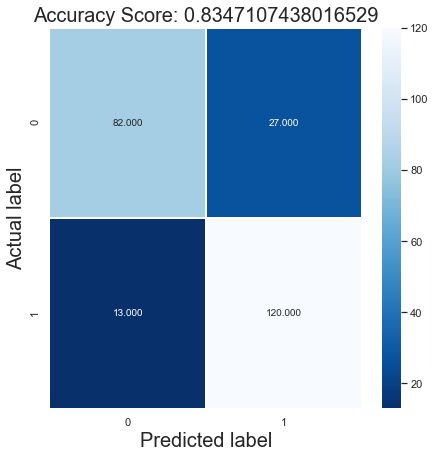

In [26]:
plt.figure(figsize=(7,7))
sns.heatmap(CM, annot=True, fmt=".3f", linewidths=.5, cmap = 'Blues_r')
plt.ylabel('Actual label',fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
all_sample_title = 'Accuracy Score: {0}'.format(reg.score(x_train,y_train))
plt.title(all_sample_title, size = 20)

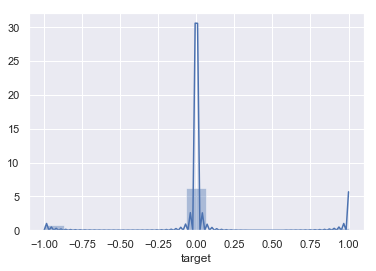

In [27]:
sns.distplot(y_train-Pred)

In [28]:
reg2 = LR()
reg2.fit(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
score = reg2.score(x_test,y_test)
score

0.9016393442622951

In [30]:
Res = reg2.predict(x_test)

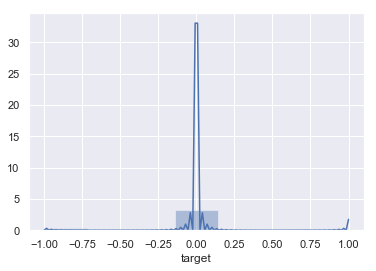

In [31]:
sns.distplot(y_test - Res)

In [32]:
CM_test = metrics.confusion_matrix(y_test,Res)
CM_test

array([[24,  5],
       [ 1, 31]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.9016393442622951')

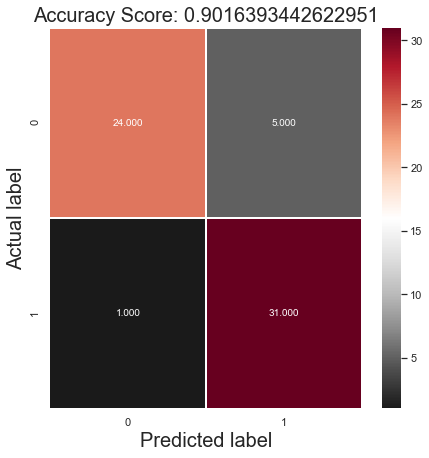

In [33]:
plt.figure(figsize=(7,7))
sns.heatmap(CM_test, annot=True, fmt=".3f", linewidths=.5, cmap = 'RdGy_r')
plt.ylabel('Actual label',fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 20)